# Load libraries & helper functions

In [1]:
%matplotlib inline
from helpers import *
# Turn interactive plotting off
plt.ioff()

# Declare parameters

In [2]:
config.DATADIR      = '/scratch/duboisjx/data/CamCAN/MRI'
config.fmriRun      = 'Movie'
# use volume or surface data
config.isCifti      = False

config.overwrite    = False

config.pipelineName = 'Finn'
# use ICA-FIX input
config.useFIX       = False
config.preWhitening = False
config.Operations   = config.operationDict[config.pipelineName]

# submit jobs with sge
config.queue        = True
# make sure to set memory requirements according to data size
# 15G for HCP data!
config.maxvmem      = '4G'

# parcellation for FC matrix
config.parcellationName = 'shen2013'
config.parcellationFile = '/scratch/duboisjx/data/parcellations/shenetal_neuroimage2013_new/shen_3mm_268_parcellation.nii.gz'
config.nParcels         = 268

subjects = [d for d in listdir(config.DATADIR) if d[0:2]=="CC"]
subjects.sort()
print 'Found {} subjects'.format(len(subjects))
#print subjects

Found 652 subjects


# Do work

### preprocess everybody

In [3]:
keep      = np.zeros((len(subjects)),dtype=np.bool_)
i=0
displayPlot=False
for config.subject in subjects:
    if not config.queue:
        print 'SUB {}/{}: {}'.format(i+1,len(subjects),config.subject)
    keep[i] = runPipelinePar()
    i = i + 1
        
print 'Keeping {}/{} subjects'.format(np.sum(keep),len(subjects))

if config.queue:
    if len(config.joblist) != 0:
        while True:
            nleft = len(config.joblist)
            for i in range(nleft):
                myCmd = "qstat | grep ' {} '".format(config.joblist[i])
                isEmpty = False
                try:
                    cmdOut = check_output(myCmd, shell=True)
                except CalledProcessError as e:
                    isEmpty = True
                finally:
                    if isEmpty:
                        nleft = nleft-1
            if nleft == 0:
                break
            else:
                print 'Waiting for {} subjects to complete...'.format(nleft)
            sleep(10)
    print 'All done!!'

CC110062 missing
CC120376 missing
CC120409 missing
CC120462 missing
CC120470 missing
CC120640 missing
CC120987 missing
CC410129 missing
CC410390 missing
CC420061 missing
CC420091 missing
CC420137 missing
CC420197 missing
CC510629 missing
CC520745 missing
CC520868 missing
CC610028 missing
CC610050 missing
CC610058 missing
CC610071 missing
CC610076 missing
CC610146 missing
CC610308 missing
CC610372 missing
CC610405 missing
CC610469 missing
CC610496 missing
CC610658 missing
CC610671 missing
CC620005 missing
CC620557 missing
CC620685 missing
CC620919 missing
CC710214 missing
CC710350 missing
CC710858 missing
CC711035 missing
CC711244 missing
CC720290 missing
CC720511 missing
CC720646 missing
CC721519 missing
CC721704 missing
CC722421 missing
Keeping 608/652 subjects
Waiting for 220 subjects to complete...
Waiting for 158 subjects to complete...
Waiting for 108 subjects to complete...
Waiting for 72 subjects to complete...
Waiting for 33 subjects to complete...
Waiting for 11 subjects to co

### look at QC

SUB 1/652: CC110033
SUB 2/652: CC110037
SUB 3/652: CC110045
SUB 4/652: CC110056
SUB 6/652: CC110069
SUB 7/652: CC110087
SUB 8/652: CC110098
SUB 9/652: CC110101
SUB 10/652: CC110126
SUB 11/652: CC110174
SUB 12/652: CC110182
SUB 13/652: CC110187
SUB 14/652: CC110319
SUB 15/652: CC110411
SUB 16/652: CC110606
SUB 17/652: CC112141
SUB 18/652: CC120008
SUB 19/652: CC120049
SUB 20/652: CC120061
SUB 21/652: CC120065
SUB 22/652: CC120120
SUB 23/652: CC120123
SUB 24/652: CC120166
SUB 25/652: CC120182
SUB 26/652: CC120208
SUB 27/652: CC120218
SUB 28/652: CC120234
SUB 29/652: CC120264
SUB 30/652: CC120276
SUB 31/652: CC120286
SUB 32/652: CC120309
SUB 33/652: CC120313
SUB 34/652: CC120319
SUB 35/652: CC120347
SUB 39/652: CC120469
SUB 41/652: CC120550
SUB 43/652: CC120727
SUB 44/652: CC120764
SUB 45/652: CC120795
SUB 46/652: CC120816
SUB 48/652: CC121106
SUB 49/652: CC121111
SUB 50/652: CC121144
SUB 51/652: CC121158
SUB 52/652: CC121194
SUB 53/652: CC121200
SUB 54/652: CC121317
SUB 55/652: CC121397


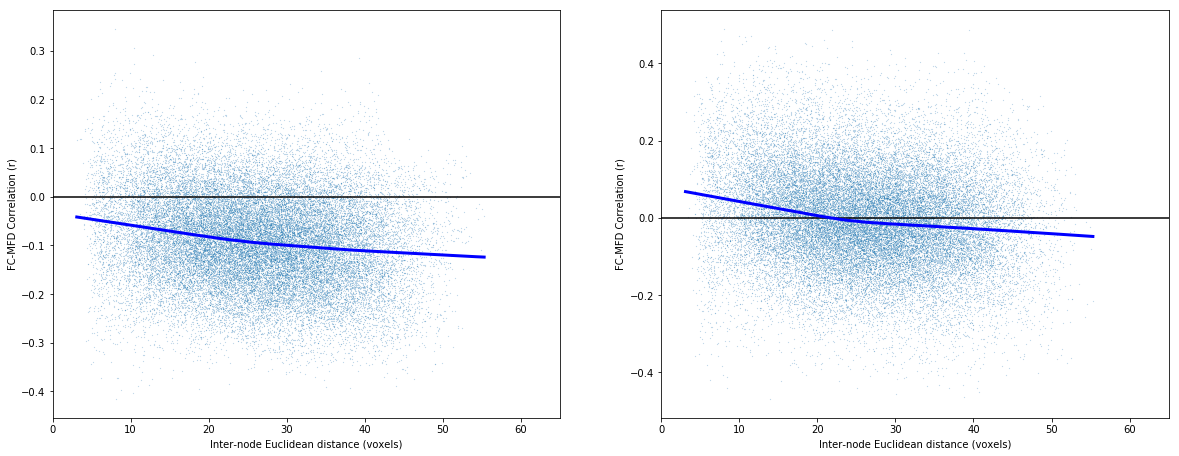

helpers.py:1744: RuntimeWarning: divide by zero encountered in arctanh
  avfcMats    = np.tanh(np.mean(np.arctanh(fcMats),2))
helpers.py:1745: RuntimeWarning: divide by zero encountered in arctanh
  avfcMats_dn = np.tanh(np.mean(np.arctanh(fcMats_dn),2))


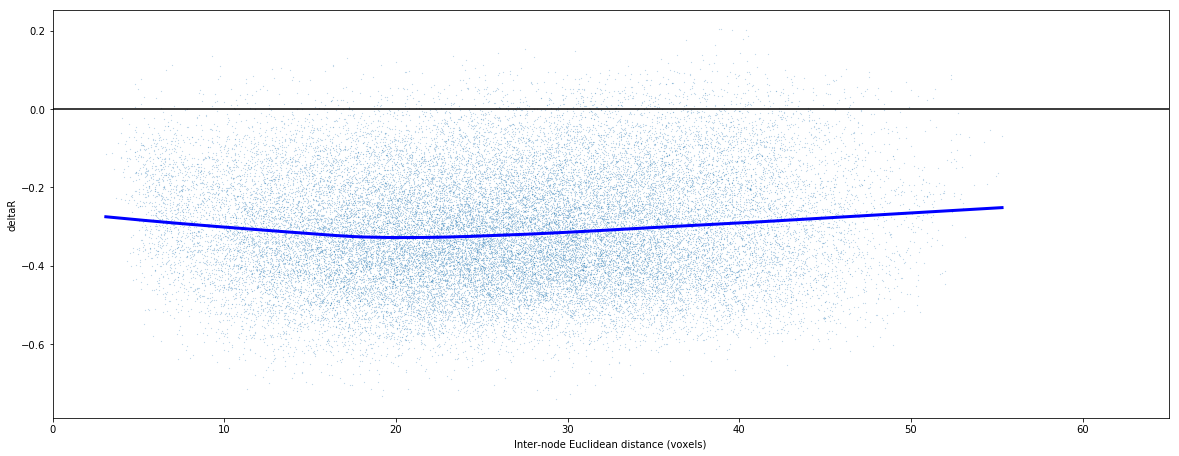

In [4]:
fdScores  = np.zeros((len(subjects)),dtype=np.float32)
fcMats    = np.zeros((config.nParcels,config.nParcels,len(subjects)),dtype=np.float32)
fcMats_dn = np.zeros((config.nParcels,config.nParcels,len(subjects)),dtype=np.float32)
displayPlot=False
i = 0
config.queue=False
for config.subject in subjects:
    if keep[i]:
        print 'SUB {}/{}: {}'.format(i+1,len(subjects),config.subject)
        runPipelinePar()
        fcMats[:,:,i],fcMats_dn[:,:,i] = plotFC(displayPlot)
        fdScores[i]=np.mean(computeFD())
    i = i + 1

fdScores  = fdScores[keep]
fcMats    = fcMats[:,:,keep]
fcMats_dn = fcMats_dn[:,:,keep]

# rsFC/mean FD plot
# since this is a correlation across subjects, it makes most sense if we have enough subjects
if len(subjects)>20:    
    plotQCrsFC(fcMats,fcMats_dn,fdScores)
    
# deltaR plot
plotDeltaR(fcMats,fcMats_dn)